In [8]:
import ROOT
from ROOT import RooFit, RooRealVar, RooCategory, RooArgSet, RooResolutionModel, RooGaussian
from IPython.display import Image, display

# Define time (lifetime) variable
t = RooRealVar("t", "time", 0.0, 10.0)

# Define tagging category (0 = B, 1 = anti-B)
tag = RooCategory("tag", "Tagging")
tag.defineType("B", 1)
tag.defineType("anti-B", -1)

# Define parameters for the decay model
tau = RooRealVar("tau", "lifetime", 1.5, 0.5, 3.0)         # Decay lifetime
dm = RooRealVar("dm", "delta mass", 0.5, 0.1, 1.0)         # Mass difference
avgMistag = RooRealVar("avgMistag", "Average Mistag Rate", 0.1, 0.0, 0.5)
a = RooRealVar("a", "CP Violation Amplitude", 0.1, -1.0, 1.0)
b = RooRealVar("b", "Decay Asymmetry", 0.0, -1.0, 1.0)
delMistag = RooRealVar("delMistag", "Delta Mistag", 0.0)
mu = RooRealVar("mu", "B0/B0-bar mass difference", 0.0)

# Resolution model (use a simple Gaussian for time resolution)
timeResMean = RooRealVar("timeResMean", "Time Resolution Mean", 0.0)
timeResSigma = RooRealVar("timeResSigma", "Time Resolution Sigma", 0.1)
resModel = RooGaussian("resModel", "Gaussian Time Resolution", t, timeResMean, timeResSigma)

# Create the RooBCPGenDecay PDF (single-sided decay type)
decay_pdf = ROOT.RooBCPGenDecay("decay_pdf", "BCP Gen Decay", t, tag, tau, dm, avgMistag, a, b, delMistag, mu, resModel, ROOT.RooBCPGenDecay.SingleSided)
# decay_pdf = ROOT.RooBCPGenDecay("decay_pdf", "BCP Gen Decay", t, tag, tau, dm, avgMistag, a, b, delMistag, mu, resModel)

# Generate toy data from the decay PDF
data = decay_pdf.generate(RooArgSet(t, tag), 10000)

# Create a frame for plotting time (t)
tframe = t.frame(RooFit.Title("BCPGenDecay PDF with CP Violation"))

# Plot the generated data
data.plotOn(tframe)

# Plot the decay PDF on the same frame
decay_pdf.plotOn(tframe)

# Create a canvas to draw the plot
c1 = ROOT.TCanvas("c1", "BCPGenDecay", 800, 600)
tframe.Draw()

# Save the plot as an image
c1.SaveAs("BCPGenDecay_plot.png")

# Display the image in Jupyter notebook
display(Image(filename="BCPGenDecay_plot.png"))


TypeError: none of the 3 overloaded methods succeeded. Full details:
  RooBCPGenDecay::RooBCPGenDecay(const RooBCPGenDecay& other, const char* name = 0) =>
    TypeError: takes at most 2 arguments (13 given)
  RooBCPGenDecay::RooBCPGenDecay() =>
    TypeError: takes at most 0 arguments (13 given)
  RooBCPGenDecay::RooBCPGenDecay(const char* name, const char* title, RooRealVar& t, RooAbsCategory& tag, RooAbsReal& tau, RooAbsReal& dm, RooAbsReal& avgMistag, RooAbsReal& a, RooAbsReal& b, RooAbsReal& delMistag, RooAbsReal& mu, const RooResolutionModel& model, RooBCPGenDecay::DecayType type = DoubleSided) =>
    TypeError: could not convert argument 12

[#0] WARNING:InputArguments -- The parameter 'timeResSigma' with range [-1e+30, 1e+30] of the RooGaussian 'resModel' exceeds the safe range of (0, inf). Advise to limit its range.


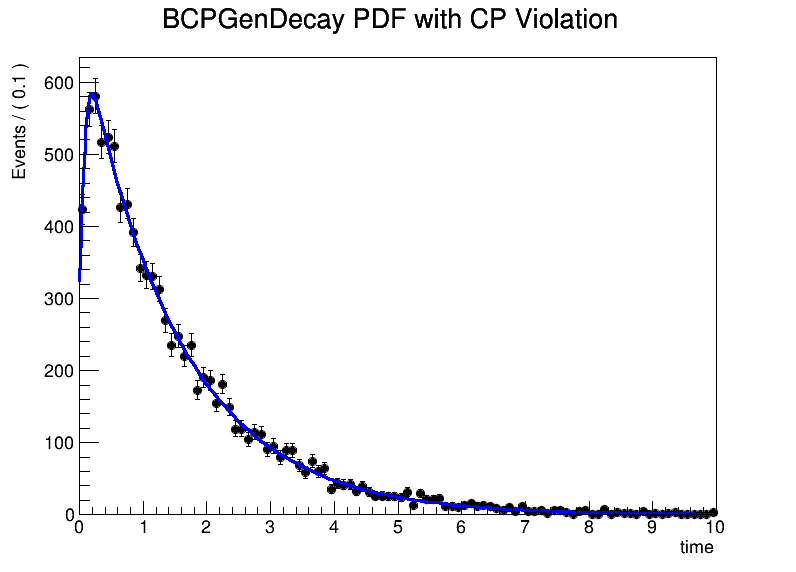

[#1] INFO:InputArguments -- The formula exp(-@0/@1)_t_tau_dm claims to use the variables (t,tau,dm) but only (t,tau) seem to be in use.
  inputs:         exp(-@0/@1)
[#1] INFO:Plotting -- RooAbsReal::plotOn(decay_pdf) plot on t integrates over variables (tag)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file BCPGenDecay_plot.png has been created


In [10]:
import ROOT
from ROOT import RooFit, RooRealVar, RooCategory, RooArgSet, RooGaussModel
from IPython.display import Image, display

# Define time (lifetime) variable
t = RooRealVar("t", "time", 0.0, 10.0)

# Define tagging category (0 = B, 1 = anti-B)
tag = RooCategory("tag", "Tagging")
tag.defineType("B", 1)
tag.defineType("anti-B", -1)

# Define parameters for the decay model
tau = RooRealVar("tau", "lifetime", 1.5, 0.5, 3.0)         # Decay lifetime
dm = RooRealVar("dm", "delta mass", 0.5, 0.1, 1.0)         # Mass difference
avgMistag = RooRealVar("avgMistag", "Average Mistag Rate", 0.1, 0.0, 0.5)
a = RooRealVar("a", "CP Violation Amplitude", 0.1, -1.0, 1.0)
b = RooRealVar("b", "Decay Asymmetry", 0.0, -1.0, 1.0)
delMistag = RooRealVar("delMistag", "Delta Mistag", 0.0)
mu = RooRealVar("mu", "B0/B0-bar mass difference", 0.0)

# Use a RooGaussModel for the time resolution (which is a valid RooResolutionModel)
timeResMean = RooRealVar("timeResMean", "Time Resolution Mean", 0.0)
timeResSigma = RooRealVar("timeResSigma", "Time Resolution Sigma", 0.1)
resModel = RooGaussModel("resModel", "Gaussian Time Resolution", t, timeResMean, timeResSigma)

# Create the RooBCPGenDecay PDF with the required arguments
decay_pdf = ROOT.RooBCPGenDecay("decay_pdf", "BCP Gen Decay", t, tag, tau, dm, avgMistag, a, b, delMistag, mu, resModel, ROOT.RooBCPGenDecay.SingleSided)

# Generate toy data from the decay PDF
data = decay_pdf.generate(RooArgSet(t, tag), 10000)

# Create a frame for plotting time (t)
tframe = t.frame(RooFit.Title("BCPGenDecay PDF with CP Violation"))

# Plot the generated data
data.plotOn(tframe)

# Plot the decay PDF on the same frame
decay_pdf.plotOn(tframe)

# Create a canvas to draw the plot
c1 = ROOT.TCanvas("c1", "BCPGenDecay", 800, 600)
tframe.Draw()

# Save the plot as an image
c1.SaveAs("BCPGenDecay_plot.png")

# Display the image in Jupyter notebook
display(Image(filename="BCPGenDecay_plot.png"))
